Step1-Netflix Dataset Upload

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('NFLX.csv')  # File name NFLX
df.head()



Saving NFLX.csv to NFLX.csv


,Date,Close,High,Low,Open,Volume
0,23-05-2002,1.196429,1.242857,1.145714,1.156429,104790000
1,24-05-2002,1.210000,1.225000,1.197143,1.214286,11104800
2,28-05-2002,1.157143,1.232143,1.157143,1.213571,6609400
3,29-05-2002,1.103571,1.164286,1.085714,1.164286,6757800
4,30-05-2002,1.071429,1.107857,1.071429,1.107857,10154200


**Step2-Brief Walkthrough of the dataset**

In [ ]:
print(df.columns)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5817 non-null   object 
 1   Close   5817 non-null   float64
 2   High    5817 non-null   float64
 3   Low     5817 non-null   float64
 4   Open    5817 non-null   float64
 5   Volume  5817 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 272.8+ KB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

Step3-Descriptive statistics

In [ ]:
df.describe()


,Close,High,Low,Open,Volume
count,5817.000000,5817.000000,5817.000000,5817.000000,5.817000e+03
mean,175.637726,178.150233,172.948879,175.546123,1.512170e+07
std,241.103794,244.167788,237.718590,240.881717,1.835934e+07
min,0.372857,0.410714,0.346429,0.377857,2.856000e+05
25%,4.311429,4.408571,4.228571,4.318571,5.372800e+06
50%,47.448570,48.255714,46.557144,47.461430,9.346400e+06
75%,320.339996,325.790008,314.510010,320.390015,1.801990e+07
max,1339.130005,1341.150024,1321.209961,1338.229980,3.234140e+08


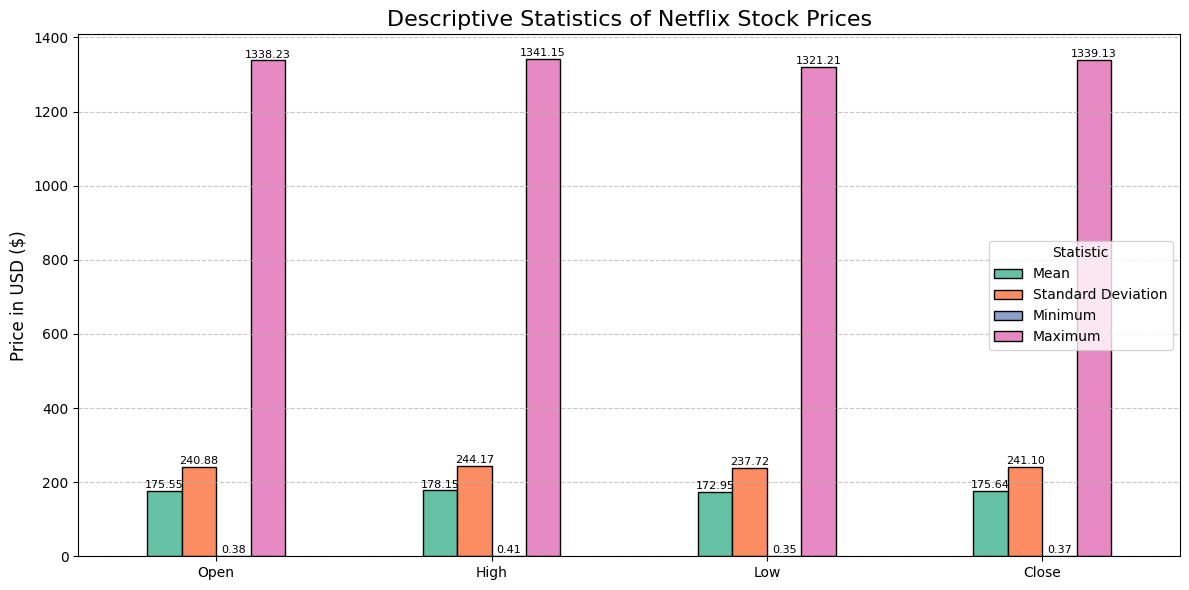

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('NFLX.csv')

# Calculate descriptive statistics
summary = df[['Open', 'High', 'Low', 'Close']].describe()
selected_stats = summary.loc[['mean', 'std', 'min', 'max']]
selected_stats.index = ['Mean', 'Standard Deviation', 'Minimum', 'Maximum']

# Transpose for better plotting
plot_data = selected_stats.transpose()

# Set custom colors for visibility
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Plot the bar chart
ax = plot_data.plot(kind='bar', figsize=(12, 6), edgecolor='black', color=colors)

# Titles and labels
plt.title('Descriptive Statistics of Netflix Stock Prices', fontsize=16)
plt.ylabel('Price in USD ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Statistic', fontsize=10)
plt.tight_layout()

# Add vertical value labels above each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position at center of bar
            height + 2,                         # Y position slightly above bar
            f'{height:.2f}',                    # Label value
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8,
            rotation=360                         # Make text vertical
        )

# Show the plot
plt.show()


Step4-Visualize Historical Stock Prices (Time Series Plot)


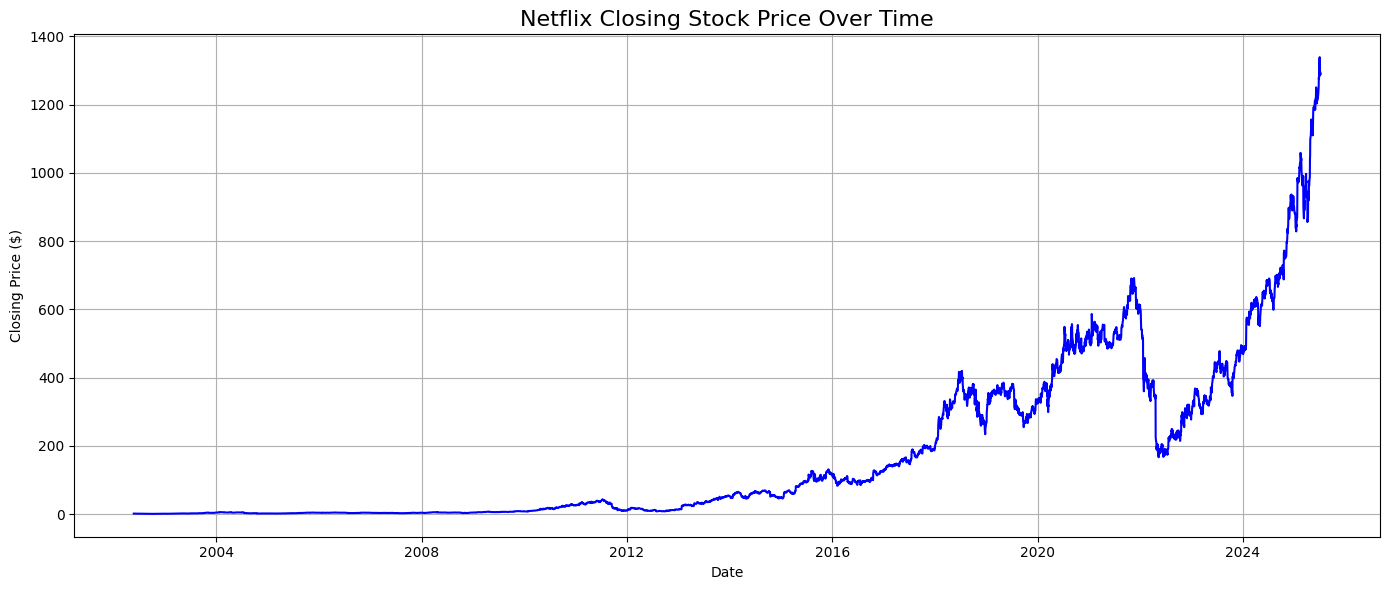

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

# Plot the Closing price
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Netflix Closing Stock Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


Step5- Only using Date & Close columns

In [ ]:
# Just keep the 'Date' and 'Close' columns
data = df[['Date', 'Close']]

# Set the 'Date' column as index
data.set_index('Date', inplace=True)


Step6-Install,Import and preparing data ready for Prophet

In [ ]:
!pip install prophet
from prophet import Prophet
# Rename the columns
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


Step7- Initialize and Train the Model

In [ ]:
# Create the model
model = Prophet()

# Train the model
model.fit(df_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhp1uki8/65ltrbxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhp1uki8/9mp1jyfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36004', 'data', 'file=/tmp/tmpbhp1uki8/65ltrbxx.json', 'init=/tmp/tmpbhp1uki8/9mp1jyfq.json', 'output', 'file=/tmp/tmpbhp1uki8/prophet_model9bluj1b8/prophet_model-20250714085857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:58:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:59:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict 365 days into the future
future = model.make_future_dataframe(periods=365)


In [ ]:
# Get the forecast
forecast = model.predict(future)


Step9- Future predictions


Top 10 Predicted Netflix Stock Prices (Future Only):
             ds        yhat  yhat_lower  yhat_upper
5817 2025-07-08  752.104879  627.932361  881.662782
5818 2025-07-09  750.711033  627.957066  868.045939
5819 2025-07-10  749.569357  634.414290  867.355077
5820 2025-07-11  747.758302  616.973154  863.642515
5821 2025-07-12  748.304551  625.371133  869.984631
5822 2025-07-13  747.240348  630.636049  873.595667
5823 2025-07-14  746.936813  626.674720  870.133506
5824 2025-07-15  744.693726  626.570863  866.653021
5825 2025-07-16  743.425114  622.038227  861.501776
5826 2025-07-17  742.488402  624.343545  867.792325


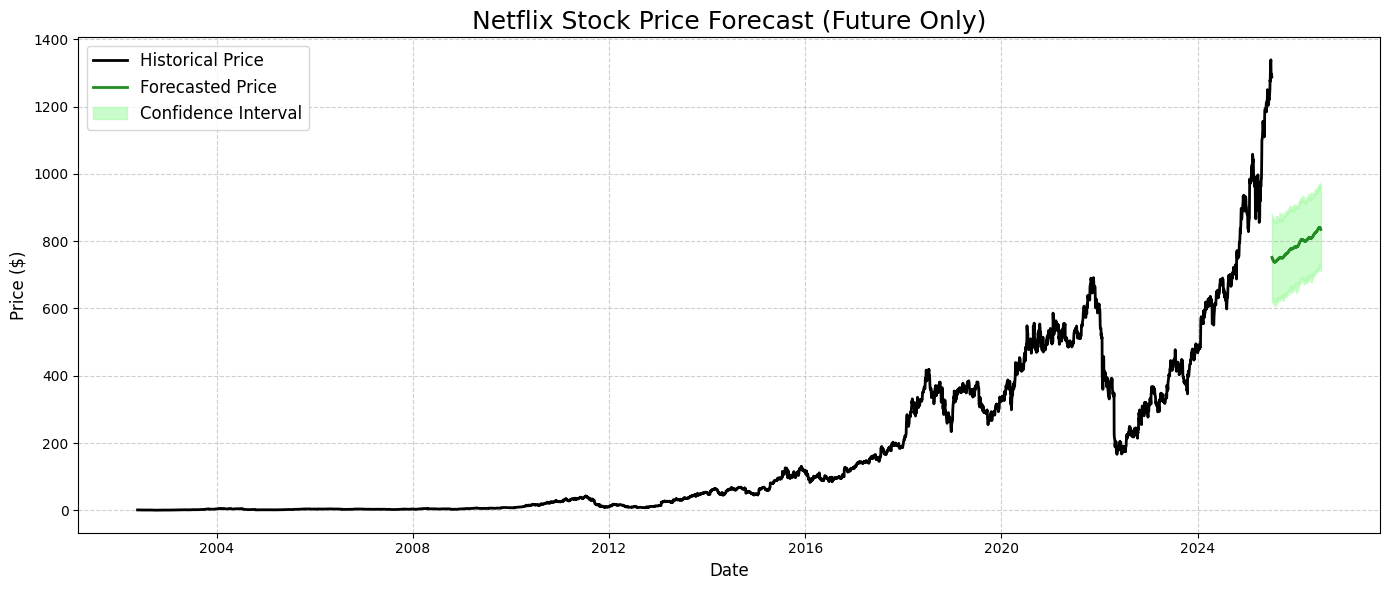

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Filter only future predictions (after last known date)
future_forecast = forecast[forecast['ds'] > df['Date'].max()]

# Step 2: Display top 10 future values
print("Top 10 Predicted Netflix Stock Prices (Future Only):")
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))

# Step 3: Plot future forecast
plt.figure(figsize=(14, 6))

# Actual historical data
plt.plot(df['Date'], df['Close'], label='Historical Price', color='black', linewidth=2)

# Forecasted price
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecasted Price', color='forestgreen', linewidth=2)

# Confidence interval (shaded)
plt.fill_between(future_forecast['ds'],
                 future_forecast['yhat_lower'],
                 future_forecast['yhat_upper'],
                 color='palegreen', alpha=0.5, label='Confidence Interval')

# Labels and styling
plt.title('Netflix Stock Price Forecast (Future Only)', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()

# Step 4: Save forecast to CSV
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('netflix_forecast.csv', index=False)



Download of the forcaste

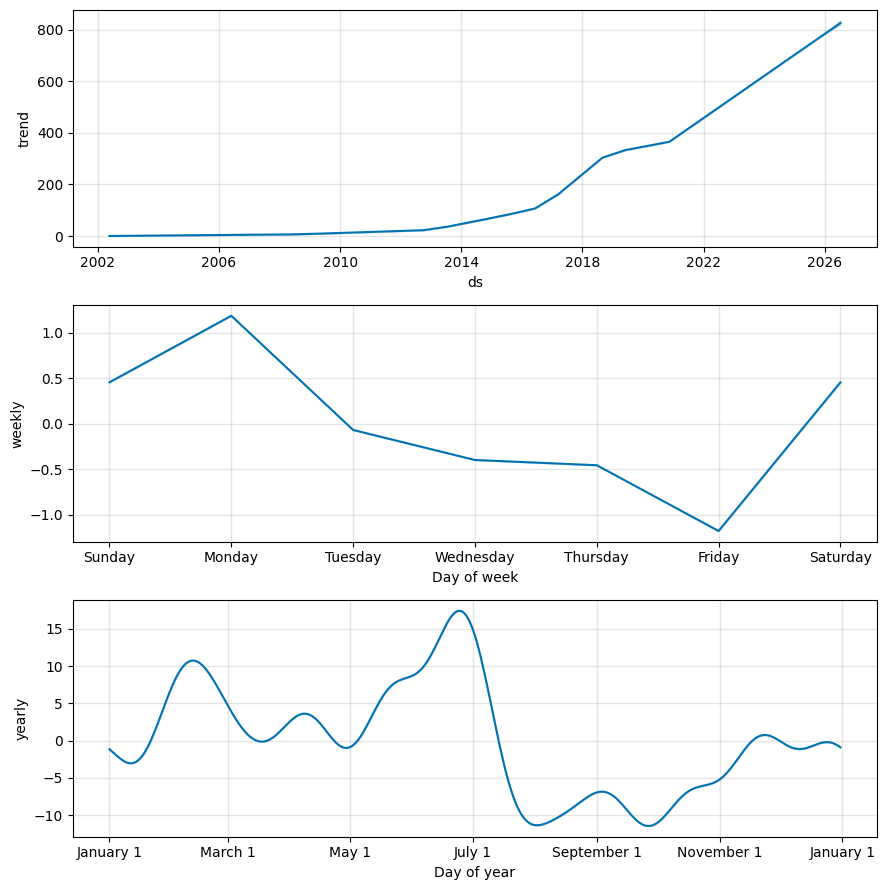

In [ ]:
fig2 = model.plot_components(forecast)


In [ ]:
files.download('netflix_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Forecast Components